# Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [56]:
data = pd.read_csv("insurance2.csv")
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [57]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [58]:
data.shape

(1338, 8)

In [59]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [61]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [62]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [63]:
print("This dataset has",data.isnull().sum().sum(),"missing/null values.")

This dataset has 0 missing/null values.


Therfore, data cleaning is not required.

In [64]:
data["bmi"] = data["bmi"].apply(np.ceil)
data["charges"] = data["charges"].apply(np.ceil)
#converting data into int datatype to avoid future errors.
data = data.astype({"bmi": "int64", "charges": "int64"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1338 non-null   int64
 1   sex             1338 non-null   int64
 2   bmi             1338 non-null   int64
 3   children        1338 non-null   int64
 4   smoker          1338 non-null   int64
 5   region          1338 non-null   int64
 6   charges         1338 non-null   int64
 7   insuranceclaim  1338 non-null   int64
dtypes: int64(8)
memory usage: 83.8 KB


# Data Visualization 

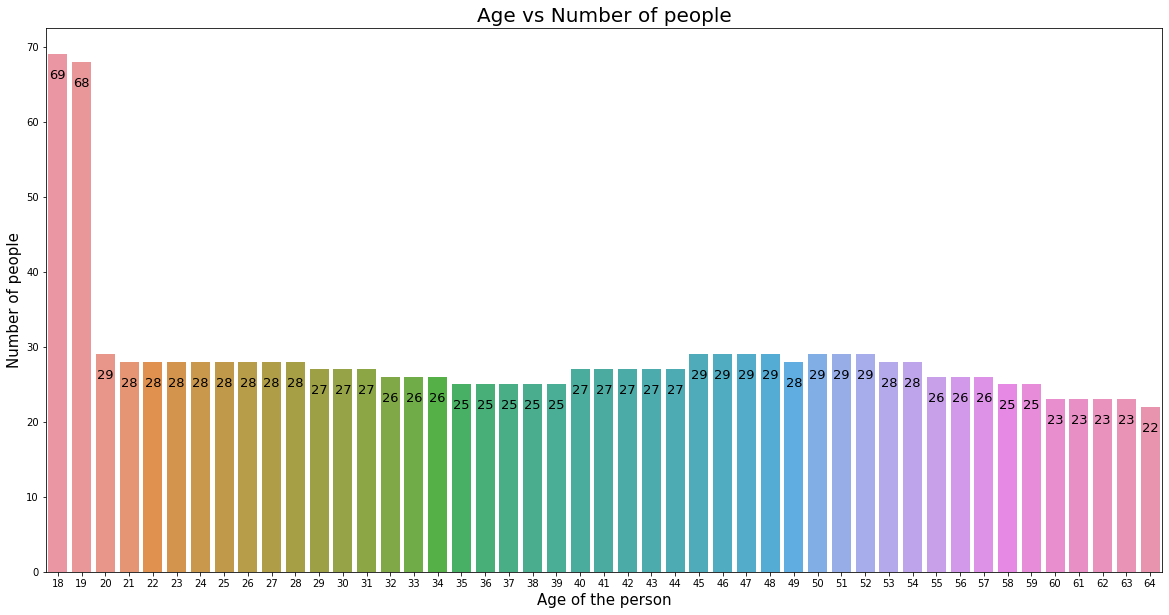

In [65]:
plt.figure(figsize = (20, 10))
plt.title("Age vs Number of people", fontsize = 20)
ax = sns.countplot(x = "age", data = data)
plt.xlabel("Age of the person", fontsize = 15)
plt.ylabel("Number of people", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha = 'center', va = 'top', size = 13 )
plt.show()

Maximum number of people belong to age 18 and 19 years.

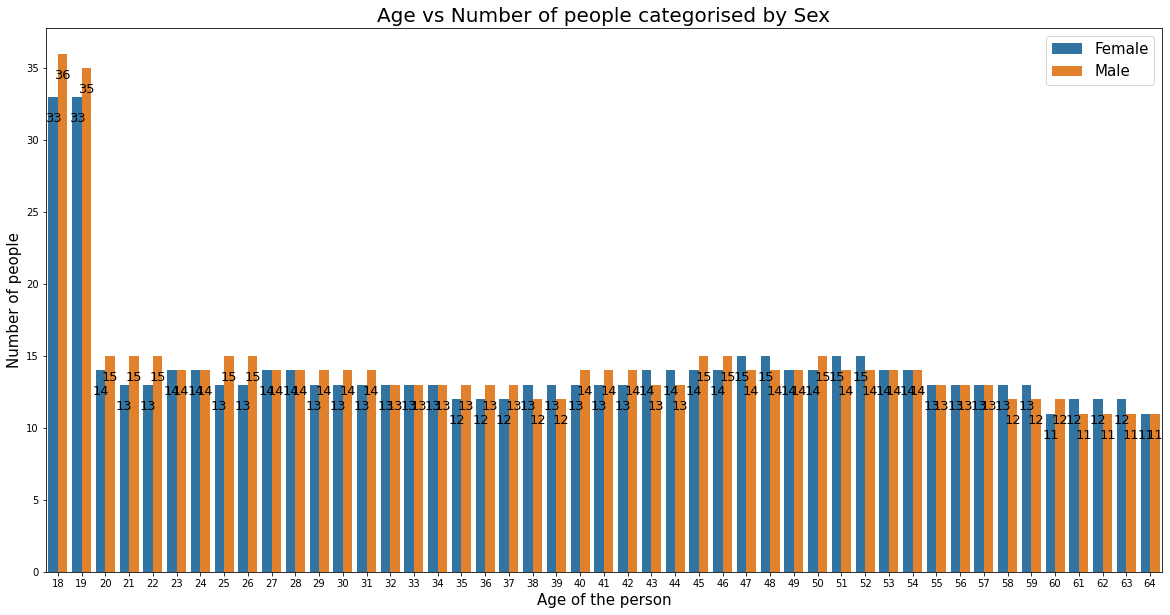

In [66]:
plt.figure(figsize = (20, 10))
plt.title("Age vs Number of people categorised by Sex", fontsize = 20)
ax = sns.countplot(x = "age", hue = "sex", data = data)
plt.xlabel("Age of the person", fontsize = 15)
plt.ylabel("Number of people", fontsize = 15)
plt.legend(labels = ["Female", "Male"], fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha = 'center', va = 'top', size = 13 )
plt.show()

Number of male is higher than number of female in most ages.

Text(0.5, 1.0, 'Sex of the person(0 : Female, 1 : Male)')

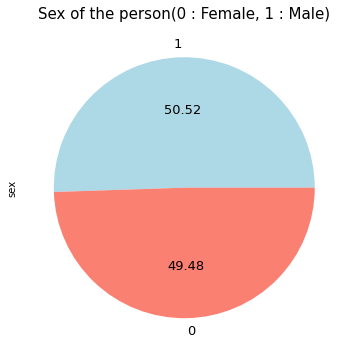

In [67]:
data["sex"].value_counts().plot.pie(autopct = "%.2f", figsize = (8,6), fontsize = 13, colors = ['lightblue', 'salmon'])
plt.title("Sex of the person(0 : Female, 1 : Male)", fontsize = 15)

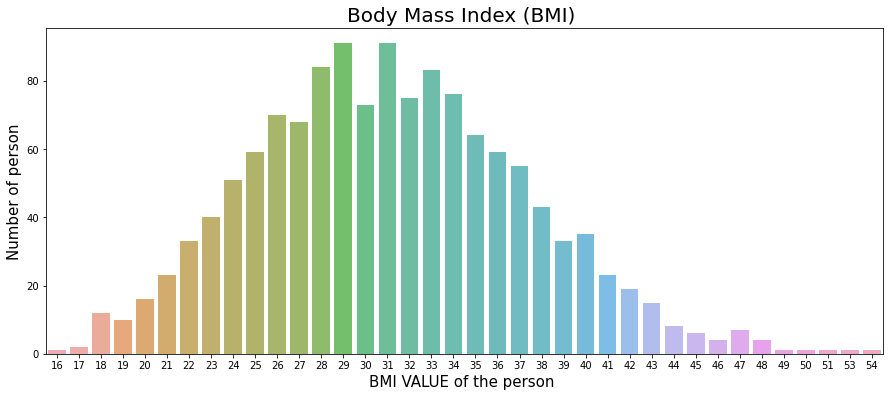

In [68]:
count = data['bmi'].value_counts()
plt.figure(figsize = (15, 6))
ax = sns.barplot(count.index, count.values, alpha = 0.8)
plt.title("Body Mass Index (BMI) ", fontsize = 20)
plt.ylabel('Number of person', fontsize = 15)
plt.xlabel("BMI VALUE of the person ", fontsize = 15)
plt.show()

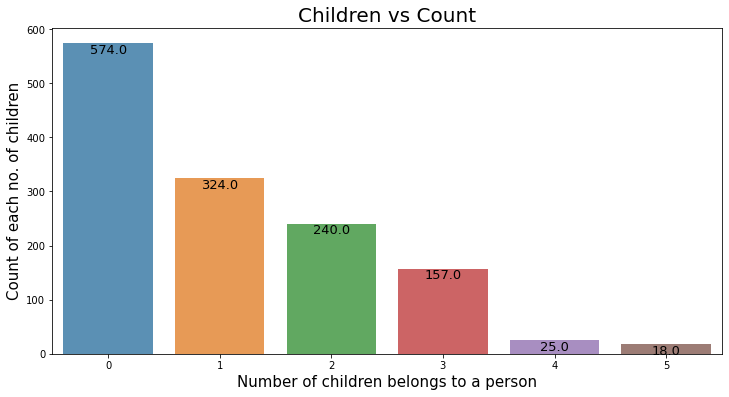

In [69]:
children_count = data['children'].value_counts()
plt.figure(figsize = (12, 6))
ax = sns.barplot(children_count.index, children_count, alpha = 0.8)
plt.title("Children vs Count", fontsize = 20)
plt.xlabel("Number of children belongs to a person", fontsize = 15)
plt.ylabel("Count of each no. of children", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha = 'center', va = 'top', size = 13 )
plt.show()

Text(0.5, 1.0, 'Smoking status of policy holder (0:non-smoker, 1:smoker) ')

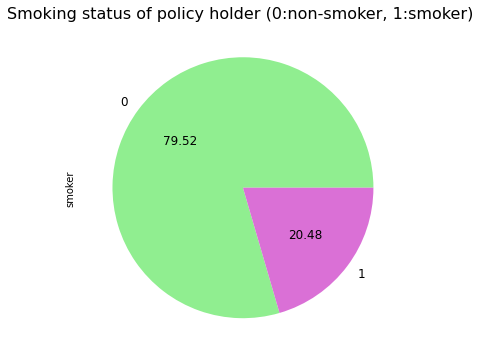

In [70]:
data['smoker'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightgreen','orchid'])
plt.title("Smoking status of policy holder (0:non-smoker, 1:smoker) ",fontsize=16)

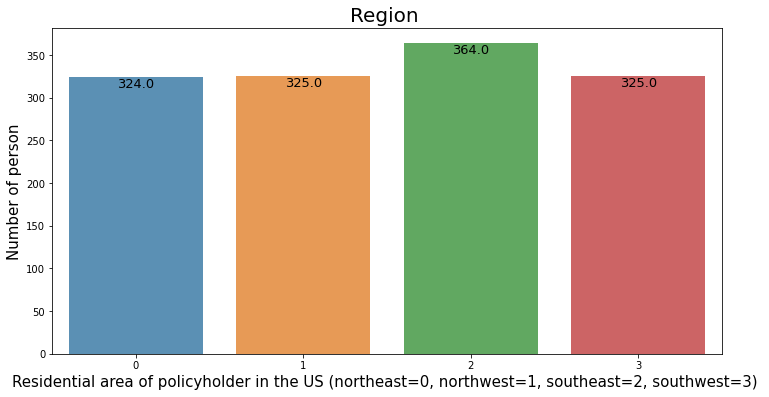

In [71]:
count=data['region'].value_counts()
plt.figure(figsize=(12,6))
ax = sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Region ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) ", fontsize=15)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha = 'center', va = 'top', size = 13 )
plt.show()

# Data Training

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1338 non-null   int64
 1   sex             1338 non-null   int64
 2   bmi             1338 non-null   int64
 3   children        1338 non-null   int64
 4   smoker          1338 non-null   int64
 5   region          1338 non-null   int64
 6   charges         1338 non-null   int64
 7   insuranceclaim  1338 non-null   int64
dtypes: int64(8)
memory usage: 83.8 KB


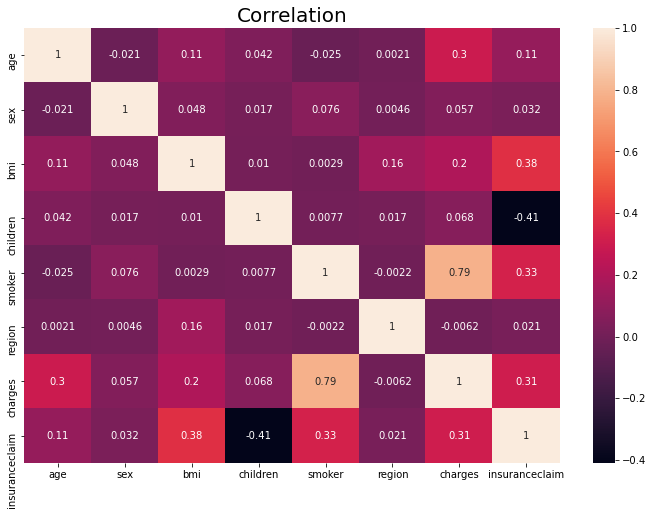

In [73]:
#find correlation between different columns
correlation = data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation, annot = True)
plt.title("Correlation", fontsize = 20)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
x_original = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
y_original = data['insuranceclaim']

y_original.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

## Applying SMOTE

In [75]:
#Since the given data is imbalanced, we use SMOTE technique to balance it.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x, y = sm.fit_resample(x_original, y_original)
y.value_counts()

0    783
1    783
Name: insuranceclaim, dtype: int64

In [76]:
#Splitting the training and testing data in ratio of 75% and 25% respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

# Appling Different Models

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LogReg = LogisticRegression(max_iter = 150)

In [78]:
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=150)

In [79]:
log_predict = LogReg.predict(x_test)
log_predict

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [80]:
print("Accuracy of Logistic Regression model is :", accuracy_score(log_predict, y_test))

Accuracy of Logistic Regression model is : 0.7372448979591837


## Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier()

In [82]:
DTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [83]:
dtree_predict = DTree.predict(x_test)
dtree_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [84]:
print("Accuracy of Decision tree Classifier is :", accuracy_score(dtree_predict, y_test))

Accuracy of Decision tree Classifier is : 0.9005102040816326


## Naive Bayes Classifier

In [85]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [86]:
naive_model.fit(x_train, y_train)

GaussianNB()

In [87]:
naive_predict = naive_model.predict(x_test)
naive_predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [88]:
print("Accuracy of Naive Bayes Classifier is :", accuracy_score(naive_predict, y_test))

Accuracy of Naive Bayes Classifier is : 0.7908163265306123


## KNN Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 30)

In [90]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [91]:
knn_predict = knn_model.predict(x_test)
knn_predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [92]:
print("Accuracy of KNN Classifier is :", accuracy_score(knn_predict, y_test))

Accuracy of KNN Classifier is : 0.6454081632653061


## Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100)

In [94]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
rf_predict = rf_model.predict(x_test)
rf_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [96]:
print("Accuracy of Random Forest Classifier is :", accuracy_score(rf_predict, y_test))

Accuracy of Random Forest Classifier is : 0.9387755102040817


# Performance Evaluation

In [97]:
from sklearn.metrics import log_loss

In [98]:
print("Model\t\t\t\t Log_loss\t\t Accuracy Score\n")
print("Logistic Regression\t\t", log_loss(log_predict, y_test), "\t", accuracy_score(log_predict, y_test))
print("DecisionTreeClassifier\t\t", log_loss(dtree_predict, y_test), "\t", accuracy_score(dtree_predict, y_test))
print("Naive Bayes Classifier\t\t", log_loss(naive_predict, y_test), "\t", accuracy_score(naive_predict, y_test))
print("KNN Classifier\t\t", log_loss(knn_predict, y_test), "\t", accuracy_score(knn_predict, y_test))
print("RandomForest Classifier\t\t", log_loss(rf_predict, y_test), "\t", accuracy_score(rf_predict, y_test))

Model				 Log_loss		 Accuracy Score

Logistic Regression		 9.075300909690577 	 0.7372448979591837
DecisionTreeClassifier		 3.436298650376405 	 0.9005102040816326
Naive Bayes Classifier		 7.225082749523135 	 0.7908163265306123
K-means Classifier		 12.247298706959484 	 0.6454081632653061
RandomForest Classifier		 2.114647520004794 	 0.9387755102040817


# Conclusion

Based on the results of performance evaluation, we conclude that Random Forest Classifier works better in this case than other classifiers and Decision tree classifier works as second better classifier.

To improve the performance, either add more data or tune the parameters of classifiers.